# <span style="color:black">Imports of libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xlrd
import os 
import io

In [2]:
%matplotlib inline

 ## <span style="color:black">Init constrains</span>

In [3]:
show_limit = 4

 # <span style="color:black">Read data in two ways</span>

In [4]:
df = pd.read_csv('imdb.csv')
df.sort_values(['Date'],ascending=False,inplace=True)
#df = pd.read_csv('imdb.txt', delimiter=',') 

 # <span style="color:black">Get preffered data</span>

In [5]:
important_stat = df[['Name','Date','Rate','Genre','Certificate']]

 # <span style="color:black">Craete a copy and clean invalid data into np.nan</span>

In [6]:
important_stat_with_nan = important_stat.copy()

In [7]:
important_stat_with_nan['Rate'] = important_stat_with_nan['Rate'].replace('No Rate', np.nan)

In [8]:
important_stat_with_nan['Rate'] = important_stat_with_nan['Rate'].astype(float)
#important_stat_with_nan.describe(include='all')

In [9]:
important_stat_with_nan.head(show_limit)

,Name,Date,Rate,Genre,Certificate
2992,Guardians of the Galaxy Vol. 3,2023,NaN,"Action, Adventure, Comedy",None
5554,Jonathan Creek,2023,8.1,"Comedy, Crime, Drama",TV-MA
5872,One Foot in the Grave,2023,7.8,"Comedy, Drama",TV-PG
4722,One Foot in the Grave,2023,7.8,"Comedy, Drama",TV-PG


 # <span style="color:black">Group by Genre and sort by rate</span>

In [10]:
rate_df = important_stat_with_nan.groupby('Genre')['Rate'].mean().sort_values(ascending=False)
print(rate_df.head(show_limit))
print(type(rate_df))

Genre
Animation, Family              9.6
Comedy, Game-Show              9.0
Comedy, History, News          8.9
Documentary, Drama, History    8.8
Name: Rate, dtype: float64
<class 'pandas.core.series.Series'>


 # <span style="color:black">Get a dataframe by condition</span>

In [11]:
condition_pass = important_stat_with_nan.loc[(important_stat_with_nan['Certificate'] == 'PG-13') & (important_stat_with_nan['Date'] == 2019)]

In [12]:
condition_pass.head(show_limit)

,Name,Date,Rate,Genre,Certificate
1406,Fighting with My Family,2019,7.1,"Biography, Comedy, Drama",PG-13
2203,The Hustle,2019,5.4,"Comedy, Crime",PG-13
491,After,2019,5.3,"Drama, Romance",PG-13
1479,Just Mercy,2019,7.6,"Biography, Crime, Drama",PG-13


 # <span style="color:black">iteration over rows Example</span>

In [13]:
counter = 0
for index, row in important_stat_with_nan.iterrows():
    if counter >= show_limit :
        break
    print(f'Row {index}:')
    print(f'Name: {row["Name"]}')
    print(f'Date: {row["Date"]}')
    print(f'Rate: {row["Rate"]}')
    print('---')
    counter+=1

Row 2992:
Name: Guardians of the Galaxy Vol. 3
Date: 2023
Rate: nan
---
Row 5554:
Name: Jonathan Creek
Date: 2023
Rate: 8.1
---
Row 5872:
Name: One Foot in the Grave
Date: 2023
Rate: 7.8
---
Row 4722:
Name: One Foot in the Grave
Date: 2023
Rate: 7.8
---


# Save to a new csv

In [14]:
name = 'important_stat_with_nan.csv'
folder_name = 'example_save_csv'
os.makedirs(folder_name, exist_ok=True)  
important_stat_with_nan.to_csv(f'{folder_name}/{name}', index=True)  
important_stat_with_nan.to_csv(f'{name}' , index=True)  

# Open a csv file

## IO File

In [15]:
f = open('data_set_exmpl_csv_version.csv', "r")
print(f)
for x in f:
  print(x)
f.close() 

<_io.TextIOWrapper name='data_set_exmpl_csv_version.csv' mode='r' encoding='cp1252'>
ï»¿Name,Age,major

Itay,25,Computer Science

Tal,22,Philosophy

Aharon,19,Computer Science

Lev,26,Architecture

Noam,30,Architecture

Shir,18,Philosophy



## Pandas reading

In [16]:
my_csv = pd.read_csv('data_set_exmpl_csv_version.csv')  

In [17]:
print(type(my_csv))

<class 'pandas.core.frame.DataFrame'>


In [18]:
my_csv

,Name,Age,major
0,Itay,25,Computer Science
1,Tal,22,Philosophy
2,Aharon,19,Computer Science
3,Lev,26,Architecture
4,Noam,30,Architecture
5,Shir,18,Philosophy


# Matplotlib 

## x y simple example

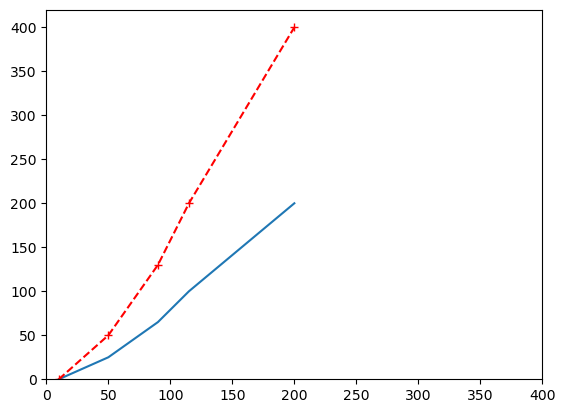

In [35]:
xpoints = np.array([10,50,90, 115,200])
ypoints = np.array([0,25,65, 100,200])
plt.plot(xpoints, ypoints)
# plt.plot(xpoints, ypoints*2 , 'r+--')
plt.axis([0,400,0,420])
ax.legend()

## Create a figure from scratch X Y Plot

In [20]:
python_course_xlsx = pd.read_excel("python_course.xlsx",header=1)

Text(0.5, 1.0, 'Python Grades over time')

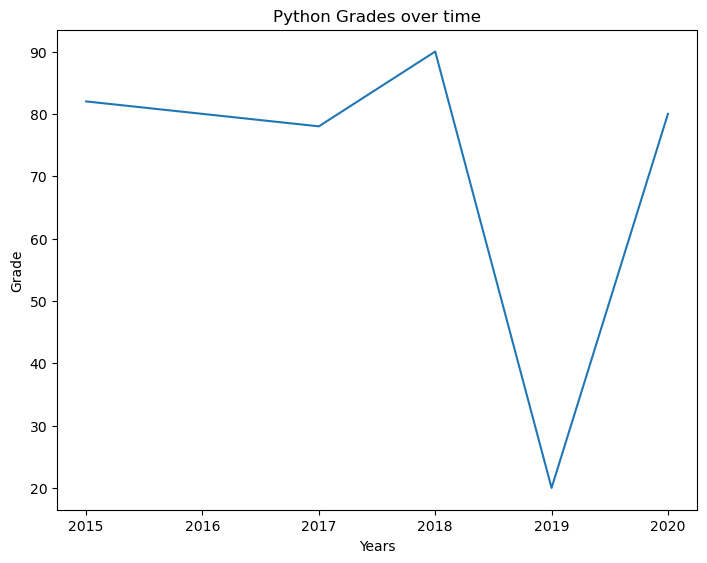

In [21]:
python_course_fig = plt.figure()
ax = python_course_fig.add_axes([0.1,0.1,1,1])
ax.plot(python_course_xlsx['Year'],python_course_xlsx['Grade'])
ax.set_xlabel('Years')
ax.set_ylabel('Grade')
ax.set_title('Python Grades over time')

## Making subplots

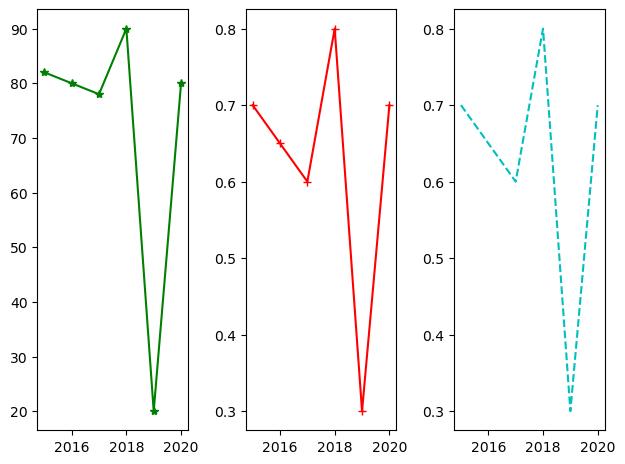

In [22]:
sub_plot_fig ,ax = plt.subplots(nrows=1 , ncols =3)
plt.tight_layout()
ax[0].plot(python_course_xlsx['Year'],python_course_xlsx['Grade'],'g*-')
ax[1].plot(python_course_xlsx['Year'],python_course_xlsx['Attendance'],'r+-')
ax[2].plot(python_course_xlsx['Year'],python_course_xlsx['Attendance'],'c--')

In [23]:
x = np.linspace(0,100,110)
y= x**2

In [24]:
colors = ['b','g' , 'r' ,'c']

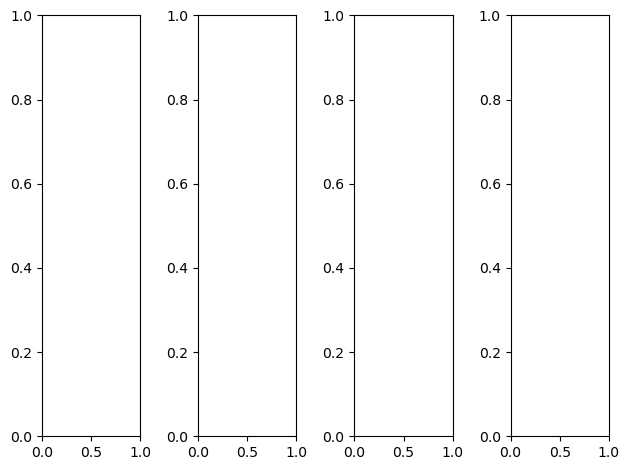

In [30]:
fig , axes = plt.subplots(nrows=1 , ncols = 4)
plt.tight_layout()

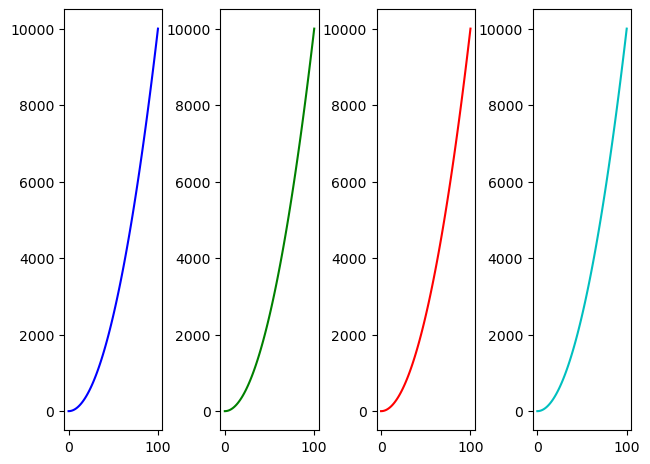

In [26]:
for axis , color in zip(axes ,colors):
    axis.plot(x,y,color)
fig

##### https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

## Both plots on the same figure

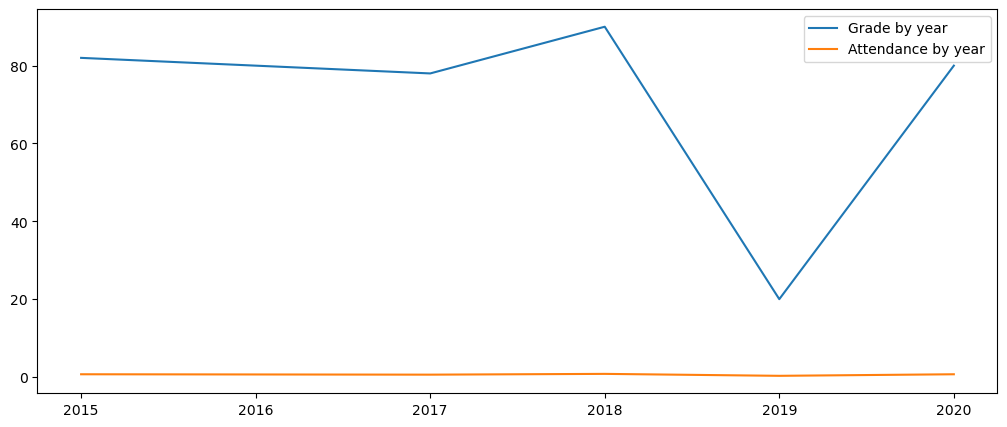

In [27]:
unified_fig = plt.figure()
ax = unified_fig.add_axes([0.1,0.1,1.5,0.8])
ax.plot(python_course_xlsx['Year'],python_course_xlsx['Grade'], label='Grade by year')
#python_course_xlsx['Attendance']=python_course_xlsx['Attendance'].apply(lambda x : x*100)
ax.plot(python_course_xlsx['Year'],python_course_xlsx['Attendance'], label='Attendance by year')
#ax.plot(python_course_xlsx['Year'],python_course_xlsx['Attendance_alternative'], label='Attendance by year alter')
ax.legend(loc=1)

# Weather excersise

In [28]:
Weather_df = pd.read_excel("Weather.xlsx",header =1)

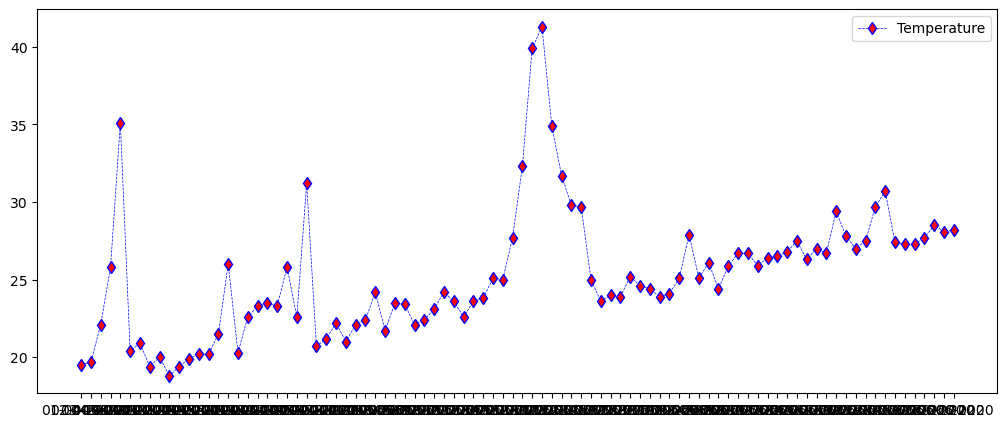

In [29]:
Weather_fig = plt.figure()
ax = Weather_fig.add_axes([0.1,0.1,1.5,0.8])
ax.plot(Weather_df['Date'],Weather_df['Temperature'], c = 'blue',  lw = 0.5, ls = '--', marker = 'd', markerfacecolor='red' ,label = 'Temperature')
ax.legend(loc=1)

#### https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html